> Supreme Team Assignment, All rights reserved
>


### Authored by:
Team Name: Team Supreme

Team Members: Vellanki Sai Bharadwaja, Sri Ram Sripada, Yogesh, Revanth Reddy Sana, Aswith, Tarun.

### Problem Statement

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

The data set selected is “Customer Segmentation” attached is the link for easy reference – “https://www.kaggle.com/datasets/vetrirah/customer?datasetId=848479”

### Variables Description

Variable -> Definition

ID -> Unique ID 

Gender -> Gender of the customer

Ever_Married -> Marital status of the customer

Age -> Age of the customer (Continuous)

Graduated -> Is the customer a graduate?

Profession -> Profession of the customer

Work_Experience -> Work Experience in years (Continuous)

Spending_Score -> Spending score of the customer

Family_Size -> Number of family members for the customer(including the customer) (Continuous)

Var_1 -> Anonymised Category for the customer

Segmentation(target) -> Customer Segment of the customer

### Multi Class Classification

A classification task with more than two classes; e.g., classify a set of segmentation of customers which is A,B,C,orD. 

Multi-class classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time.

Common examples include image classification (is it a cat, dog, human, etc) or handwritten digit recognition (classifying an image of a handwritten number into a digit from 0 to 9).

In machine learning, multiclass or multinomial classification is the problem of classifying instances into one of three or more classes (classifying instances into one of two classes is called binary classification).

Multiclass classification should not be confused with multi-label classification, where multiple labels are to be predicted for each instance.

### Steps that we have followed in this notebook

1. Understand the Problem Statement & Import Packages and Datasets.

2. Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :

3. Explore Train and Test Data and get to know what each Column / Feature denotes.

4. Check for Imbalance of Target Column in Datasets.
5. Visualize Count Plots & Unique Values to infer from Datasets.
6. Remove Duplicate Rows from Train Data if present.

7. Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill.

8. Split Train Data into Train and Validation Data with Predictors(Independent) & Target(Dependent).

9. Data Encoding - Label Encoding, OneHot Encoding and Data Scaling - MinMaxScaler, StandardScaler, RobustScaler

10. Create Baseline ML Model for Multi Class Classification Problem

11. Improve ML Model,Fine Tune with MODEL Evaluation METRIC - "Accuracy" and Predict Traget "Outcome"

12. Result Submission, Check Leaderboard & Improve "Accuracy" Score

### Step1: Import all required libraries

In [160]:
import pandas as pd
from sklearn import *
from sklearn import preprocessing 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import plot_tree

np.random.seed(1)

from sklearn.model_selection import RepeatedStratifiedKFold


# import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np



# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier





# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step2: Load the data, clean and prepare data for analysis

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [4]:
uploaded1 = files.upload()

Saving Test.csv to Test.csv


In [6]:
import io
customer_df = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
customer_test_df = pd.read_csv(io.BytesIO(uploaded1['Test.csv']))

In [7]:
#customer_test_df = pd.read_csv("C:/Users/vella/ism6136/Test.csv")

In [8]:
customer_df.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [9]:
customer_df.shape

(8068, 11)

Checking the number of rows and columns in the data set selected

In [10]:
customer_df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


Check column names, and for our convenience, let's remove whitespaces and '.' if any...

In [11]:
customer_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

### Step3: Clean up Column names - Removing whitespaces and '.' and replacing it with '_' and converting them to uppercase headers in all columns

In [12]:
customer_df.columns = [s.strip().upper().replace('.', '_') for s in customer_df.columns] 
customer_df.columns = [s.strip().upper().replace(' ', '_') for s in customer_df.columns] 

In [13]:
customer_df.columns

Index(['ID', 'GENDER', 'EVER_MARRIED', 'AGE', 'GRADUATED', 'PROFESSION',
       'WORK_EXPERIENCE', 'SPENDING_SCORE', 'FAMILY_SIZE', 'VAR_1',
       'SEGMENTATION'],
      dtype='object')

#### Exploring the datatypes of all the variables

In [14]:
customer_df.dtypes

ID                   int64
GENDER              object
EVER_MARRIED        object
AGE                  int64
GRADUATED           object
PROFESSION          object
WORK_EXPERIENCE    float64
SPENDING_SCORE      object
FAMILY_SIZE        float64
VAR_1               object
SEGMENTATION        object
dtype: object

#### We are now replacing all the 'object' datatypes to 'category' datatypes by converting them to categorical datatypes

In [15]:
customer_df.GENDER = customer_df.GENDER.astype('category')
customer_df.EVER_MARRIED = customer_df.EVER_MARRIED.astype('category')
customer_df.GRADUATED = customer_df.GRADUATED.astype('category')
customer_df.PROFESSION = customer_df.PROFESSION.astype('category')
customer_df.SPENDING_SCORE = customer_df.SPENDING_SCORE.astype('category')
customer_df.VAR_1 = customer_df.VAR_1.astype('category')
customer_df.SEGMENTATION = customer_df.SEGMENTATION.astype('category')

#### Now we have converted all our 'object' datatypes to 'categorical' datatypes

In [16]:
customer_df.dtypes

ID                    int64
GENDER             category
EVER_MARRIED       category
AGE                   int64
GRADUATED          category
PROFESSION         category
WORK_EXPERIENCE     float64
SPENDING_SCORE     category
FAMILY_SIZE         float64
VAR_1              category
SEGMENTATION       category
dtype: object

### check for missing values

In [17]:
customer_df.isnull().sum()

ID                   0
GENDER               0
EVER_MARRIED       140
AGE                  0
GRADUATED           78
PROFESSION         124
WORK_EXPERIENCE    829
SPENDING_SCORE       0
FAMILY_SIZE        335
VAR_1               76
SEGMENTATION         0
dtype: int64

### Exploring All unique values of all the integer and float variables using **unique()** 

In [18]:
print(customer_df['FAMILY_SIZE'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_df['WORK_EXPERIENCE'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')

[ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
---------------------------------------------------------------------------------------------------------------------------
[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
---------------------------------------------------------------------------------------------------------------------------


### Exploring All unique values of all the categorical variables using **unique()** 

In [19]:
print(customer_df['GENDER'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_df['EVER_MARRIED'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_df['GRADUATED'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_df['PROFESSION'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_df['SPENDING_SCORE'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_df['VAR_1'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_df['SEGMENTATION'].unique())

['Male', 'Female']
Categories (2, object): ['Female', 'Male']
---------------------------------------------------------------------------------------------------------------------------
['No', 'Yes', NaN]
Categories (2, object): ['No', 'Yes']
---------------------------------------------------------------------------------------------------------------------------
['No', 'Yes', NaN]
Categories (2, object): ['No', 'Yes']
---------------------------------------------------------------------------------------------------------------------------
['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist', 'Executive', 'Doctor', 'Homemaker', 'Marketing', NaN]
Categories (9, object): ['Artist', 'Doctor', 'Engineer', 'Entertainment', ..., 'Healthcare',
                         'Homemaker', 'Lawyer', 'Marketing']
---------------------------------------------------------------------------------------------------------------------------
['Low', 'Average', 'High']
Categories (3, object): ['Ave

#### We can clearly observe that some of the categorical variables and integer/float variables (like 'EVER_MARRIED','GRADUATED','PROFESSION','VAR_1','WORK_EXPERIENCE', and 'FAMILY_SIZE') have 'nan' as unique value 

In [20]:
customer_df.isnull().sum()

ID                   0
GENDER               0
EVER_MARRIED       140
AGE                  0
GRADUATED           78
PROFESSION         124
WORK_EXPERIENCE    829
SPENDING_SCORE       0
FAMILY_SIZE        335
VAR_1               76
SEGMENTATION         0
dtype: int64

### Filling NaN values in 'EVER_MARRIED' variable with Most repeated element 'Yes' (MODE)

In [21]:
customer_df['EVER_MARRIED'].describe()

count     7928
unique       2
top        Yes
freq      4643
Name: EVER_MARRIED, dtype: object

In [22]:
customer_df['EVER_MARRIED'] = customer_df['EVER_MARRIED'].fillna('Yes')

In [23]:
print(customer_df['EVER_MARRIED'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
---------------------------------------------------------------------------------------------------------------------------


#### Filling NaN values in 'GRADUATED' variable with Most repeated element 'Yes' (MODE)

In [24]:
customer_df['GRADUATED'].describe()

count     7990
unique       2
top        Yes
freq      4968
Name: GRADUATED, dtype: object

In [25]:
customer_df['GRADUATED'] = customer_df['GRADUATED'].fillna('Yes')

In [26]:
print(customer_df['GRADUATED'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
---------------------------------------------------------------------------------------------------------------------------


#### Filling NaN values in 'PROFESSION' variable with Most repeated element 'Artist' (MODE)

In [27]:
customer_df.PROFESSION.describe()

count       7944
unique         9
top       Artist
freq        2516
Name: PROFESSION, dtype: object

In [28]:
customer_df['PROFESSION'] = customer_df['PROFESSION'].fillna('Artist')

In [29]:
print(customer_df['PROFESSION'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')

['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist', 'Executive', 'Doctor', 'Homemaker', 'Marketing']
Categories (9, object): ['Artist', 'Doctor', 'Engineer', 'Entertainment', ..., 'Healthcare',
                         'Homemaker', 'Lawyer', 'Marketing']
---------------------------------------------------------------------------------------------------------------------------


In [30]:
customer_df.PROFESSION.describe()

count       8068
unique         9
top       Artist
freq        2640
Name: PROFESSION, dtype: object

#### Filling NaN values in 'VAR_1' variable with Most repeated element 'Cat_6' (MODE)

In [31]:
customer_df.VAR_1.describe()

count      7992
unique        7
top       Cat_6
freq       5238
Name: VAR_1, dtype: object

In [32]:
customer_df['VAR_1'] = customer_df['VAR_1'].fillna('Cat_6')

In [33]:
print(customer_df['VAR_1'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')

['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5']
Categories (7, object): ['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7']
---------------------------------------------------------------------------------------------------------------------------


#### Filling NaN values in 'WORK_EXPERIENCE' variable with Mean of the column

In [34]:
customer_df.WORK_EXPERIENCE.describe()

count    7239.000000
mean        2.641663
std         3.406763
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: WORK_EXPERIENCE, dtype: float64

In [35]:
customer_df['WORK_EXPERIENCE'].mean()

2.641663213150988

In [36]:
customer_df['WORK_EXPERIENCE'].mode()

0    1.0
dtype: float64

In [37]:
customer_df['WORK_EXPERIENCE'] = customer_df['WORK_EXPERIENCE'].fillna(customer_df['WORK_EXPERIENCE'].mean())

In [38]:
print(customer_df['WORK_EXPERIENCE'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')

[ 1.          2.64166321  0.          4.          9.         12.
  3.         13.          5.          8.         14.          7.
  2.          6.         10.         11.        ]
---------------------------------------------------------------------------------------------------------------------------


In [39]:
customer_df.WORK_EXPERIENCE.describe()

count    8068.000000
mean        2.641663
std         3.226972
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: WORK_EXPERIENCE, dtype: float64

#### Filling NaN values in 'FAMILY_SIZE' variable with Mean of the column

In [40]:
customer_df.FAMILY_SIZE.describe()

count    7733.000000
mean        2.850123
std         1.531413
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: FAMILY_SIZE, dtype: float64

In [41]:
customer_df['FAMILY_SIZE'].mean()

2.85012285012285

In [42]:
customer_df['FAMILY_SIZE'].mode()

0    2.0
dtype: float64

In [43]:
customer_df['FAMILY_SIZE'].median()

3.0

In [44]:
customer_df['FAMILY_SIZE'] = customer_df['FAMILY_SIZE'].fillna(customer_df['FAMILY_SIZE'].mean())

In [45]:
print(customer_df['FAMILY_SIZE'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')

[4.         3.         1.         2.         6.         2.85012285
 5.         8.         7.         9.        ]
---------------------------------------------------------------------------------------------------------------------------


### Checking the null values to make sure there are no nan values left in any of the columns

In [46]:
customer_df.isnull().sum()

ID                 0
GENDER             0
EVER_MARRIED       0
AGE                0
GRADUATED          0
PROFESSION         0
WORK_EXPERIENCE    0
SPENDING_SCORE     0
FAMILY_SIZE        0
VAR_1              0
SEGMENTATION       0
dtype: int64

## Exploring Categorical Variables

**BAR PLOT FOR GENDER**

Most of the customers are Male

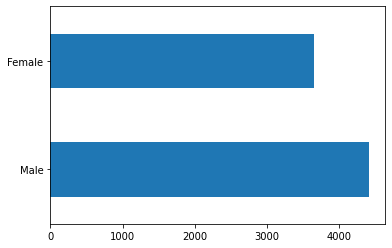

In [47]:
customer_df.GENDER.value_counts().sort_index(ascending=False).plot(kind='barh')

**BAR PLOT FOR EVERMARRIED**

Most of the customers have marital status as yes which means they are married 

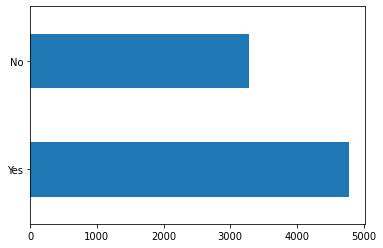

In [48]:
customer_df.EVER_MARRIED.value_counts().sort_index(ascending=False).plot(kind='barh')

**BAR PLOT FOR GRADUATED**

Most of the customers are Graduated

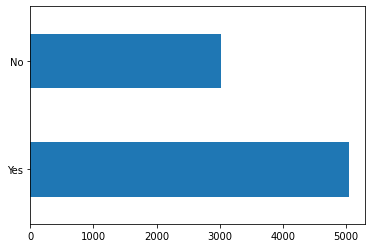

In [49]:
customer_df.GRADUATED.value_counts().sort_index(ascending=False).plot(kind='barh')

**BAR PLOT FOR PROFESSION**

Most of the customers belong to the profession 'Artist'.

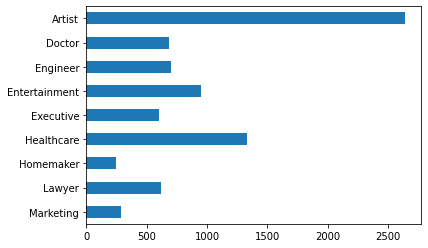

In [50]:
customer_df.PROFESSION.value_counts().sort_index(ascending=False).plot(kind='barh')

**BAR PLOT FOR SPENDINGSCORE**

Most of the customers have low spending score.

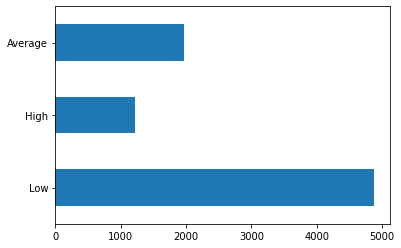

In [51]:
customer_df.SPENDING_SCORE.value_counts().sort_index(ascending=False).plot(kind='barh')

**BAR PLOT FOR VAR1**

Most of the customers belong to Cat_6 category

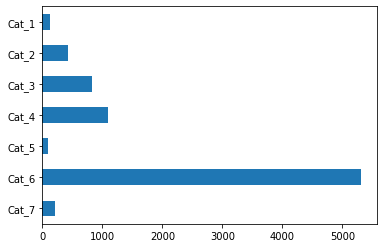

In [52]:
customer_df.VAR_1.value_counts().sort_index(ascending=False).plot(kind='barh')

**BAR PLOT FOR SEGMENTATION**

Most of the customers belong to D segment. However, if we consider the entire data, all of the customers in segment A,B,C,D are comparable in numbers. 

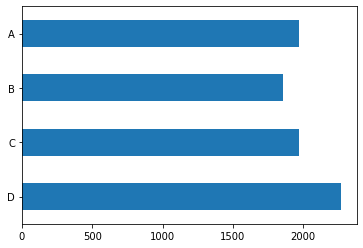

In [53]:
customer_df.SEGMENTATION.value_counts().sort_index(ascending=False).plot(kind='barh')

## Step 4: Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

### Applying Label encoding to multiple columns 

In [55]:
categ = ['GENDER','EVER_MARRIED','GRADUATED', 'PROFESSION', 'SPENDING_SCORE', 'VAR_1', 'SEGMENTATION']

# Encode Categorical Columns
enc = LabelEncoder()
#enc = OrdinalEncoder()
customer_df[categ] = customer_df[categ].apply(enc.fit_transform)

In [56]:
customer_df.head(10)

,ID,GENDER,EVER_MARRIED,AGE,GRADUATED,PROFESSION,WORK_EXPERIENCE,SPENDING_SCORE,FAMILY_SIZE,VAR_1,SEGMENTATION
0,462809,1,0,22,0,5,1.000000,2,4.0,3,3
1,462643,0,1,38,1,2,2.641663,0,3.0,3,0
2,466315,0,1,67,1,2,1.000000,2,1.0,5,1
3,461735,1,1,67,1,7,0.000000,1,2.0,5,1
4,462669,0,1,40,1,3,2.641663,1,6.0,5,0
5,461319,1,1,56,0,0,0.000000,0,2.0,5,2
6,460156,1,0,32,1,5,1.000000,2,3.0,5,2
7,464347,0,0,33,1,5,1.000000,2,3.0,5,3
8,465015,0,1,61,1,2,0.000000,2,3.0,6,3
9,465176,0,1,55,1,0,1.000000,0,4.0,5,2


In [57]:
customer_df['SEGMENTATION'].value_counts()

3    2268
0    1972
2    1970
1    1858
Name: SEGMENTATION, dtype: int64

#### Checking the correlation among all the variables wrt 'SEGMENTATION' variable which is our Target

We can observe that variables - ID,GENDER,WORKEXPERIENCE,VAR_1 have least correlation almost equal to zero, hence these 4 variables can be removed in our further modelling

In [58]:
customer_df.corr()

,ID,GENDER,EVER_MARRIED,AGE,GRADUATED,PROFESSION,WORK_EXPERIENCE,SPENDING_SCORE,FAMILY_SIZE,VAR_1,SEGMENTATION
ID,1.000000,0.006155,0.022892,-0.005055,-0.009377,-0.000263,-0.028876,-0.018949,0.011514,-0.001955,-0.009104
GENDER,0.006155,1.000000,0.111732,0.030216,-0.033206,0.025079,-0.056732,-0.054261,0.054702,0.029660,0.026403
EVER_MARRIED,0.022892,0.111732,1.000000,0.556892,0.188450,-0.131778,-0.089964,-0.625252,-0.074340,0.076450,-0.213730
AGE,-0.005055,0.030216,0.556892,1.000000,0.235752,0.041406,-0.179361,-0.269544,-0.273291,0.167332,-0.243552
GRADUATED,-0.009377,-0.033206,0.188450,0.235752,1.000000,-0.283955,0.030660,-0.151911,-0.222938,0.120044,-0.178683
PROFESSION,-0.000263,0.025079,-0.131778,0.041406,-0.283955,1.000000,-0.019377,0.228528,0.084313,-0.039314,0.202919
WORK_EXPERIENCE,-0.028876,-0.056732,-0.089964,-0.179361,0.030660,-0.019377,1.000000,0.045731,-0.058702,0.022082,0.012252
SPENDING_SCORE,-0.018949,-0.054261,-0.625252,-0.269544,-0.151911,0.228528,0.045731,1.000000,-0.112785,-0.032833,0.100572
FAMILY_SIZE,0.011514,0.054702,-0.074340,-0.273291,-0.222938,0.084313,-0.058702,-0.112785,1.000000,-0.142808,0.190788
VAR_1,-0.001955,0.029660,0.076450,0.167332,0.120044,-0.039314,0.022082,-0.032833,-0.142808,1.000000,-0.018339


### Step5: Split Data

Split data into a 70/30 split.

In [59]:
train_df, validation_df = train_test_split(customer_df, test_size=0.3, random_state=1)

### Test Data for prediction

In [60]:
customer_test_df.columns = [s.strip().upper().replace('.', '_') for s in customer_test_df.columns] 
customer_test_df.columns = [s.strip().upper().replace(' ', '_') for s in customer_test_df.columns] 

In [61]:
print(customer_test_df['GENDER'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_test_df['EVER_MARRIED'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_test_df['GRADUATED'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_test_df['PROFESSION'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_test_df['SPENDING_SCORE'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')
print(customer_test_df['VAR_1'].unique())
print('---------------------------------------------------------------------------------------------------------------------------')

['Female' 'Male']
---------------------------------------------------------------------------------------------------------------------------
['Yes' 'No' nan]
---------------------------------------------------------------------------------------------------------------------------
['Yes' 'No' nan]
---------------------------------------------------------------------------------------------------------------------------
['Engineer' 'Healthcare' nan 'Executive' 'Marketing' 'Doctor' 'Artist'
 'Lawyer' 'Entertainment' 'Homemaker']
---------------------------------------------------------------------------------------------------------------------------
['Low' 'Average' 'High']
---------------------------------------------------------------------------------------------------------------------------
['Cat_6' 'Cat_4' 'Cat_3' nan 'Cat_1' 'Cat_2' 'Cat_5' 'Cat_7']
---------------------------------------------------------------------------------------------------------------------------


In [62]:
customer_test_df.GENDER = customer_test_df.GENDER.astype('category')
customer_test_df.EVER_MARRIED = customer_test_df.EVER_MARRIED.astype('category')
customer_test_df.GRADUATED = customer_test_df.GRADUATED.astype('category')
customer_test_df.PROFESSION = customer_test_df.PROFESSION.astype('category')
customer_test_df.SPENDING_SCORE = customer_test_df.SPENDING_SCORE.astype('category')
customer_test_df.VAR_1 = customer_test_df.VAR_1.astype('category')

In [63]:
customer_test_df.dtypes

ID                    int64
GENDER             category
EVER_MARRIED       category
AGE                   int64
GRADUATED          category
PROFESSION         category
WORK_EXPERIENCE     float64
SPENDING_SCORE     category
FAMILY_SIZE         float64
VAR_1              category
dtype: object

In [64]:
customer_test_df.isnull().sum()

ID                   0
GENDER               0
EVER_MARRIED        50
AGE                  0
GRADUATED           24
PROFESSION          38
WORK_EXPERIENCE    269
SPENDING_SCORE       0
FAMILY_SIZE        113
VAR_1               32
dtype: int64

In [65]:
customer_test_df['EVER_MARRIED'].describe()

count     2577
unique       2
top        Yes
freq      1520
Name: EVER_MARRIED, dtype: object

In [66]:
customer_test_df['EVER_MARRIED'] = customer_test_df['EVER_MARRIED'].fillna('Yes')

In [67]:
customer_test_df['EVER_MARRIED'].describe()

count     2627
unique       2
top        Yes
freq      1570
Name: EVER_MARRIED, dtype: object

In [68]:
customer_test_df.PROFESSION.describe()

count       2589
unique         9
top       Artist
freq         802
Name: PROFESSION, dtype: object

In [69]:
customer_test_df['PROFESSION'] = customer_test_df['PROFESSION'].fillna('Artist')

In [70]:
customer_test_df.PROFESSION.describe()

count       2627
unique         9
top       Artist
freq         840
Name: PROFESSION, dtype: object

In [71]:
customer_test_df.GRADUATED.describe()

count     2603
unique       2
top        Yes
freq      1602
Name: GRADUATED, dtype: object

In [72]:
customer_test_df['GRADUATED'] = customer_test_df['GRADUATED'].fillna('Yes')

In [73]:
customer_test_df.GRADUATED.describe()

count     2627
unique       2
top        Yes
freq      1626
Name: GRADUATED, dtype: object

In [74]:
customer_test_df.VAR_1.describe()

count      2595
unique        7
top       Cat_6
freq       1672
Name: VAR_1, dtype: object

In [75]:
customer_test_df['VAR_1'] = customer_test_df['VAR_1'].fillna('Cat_6')

In [76]:
customer_test_df.VAR_1.describe()

count      2627
unique        7
top       Cat_6
freq       1704
Name: VAR_1, dtype: object

In [77]:
customer_test_df.WORK_EXPERIENCE.describe()

count    2358.000000
mean        2.552587
std         3.341094
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: WORK_EXPERIENCE, dtype: float64

In [78]:
customer_test_df['WORK_EXPERIENCE'].mean()

2.552586938083121

In [79]:
customer_test_df['WORK_EXPERIENCE'].mode()

0    1.0
dtype: float64

In [80]:
customer_test_df['WORK_EXPERIENCE'].median()

1.0

In [81]:
customer_test_df['WORK_EXPERIENCE'] = customer_test_df['WORK_EXPERIENCE'].fillna(customer_test_df['WORK_EXPERIENCE'].mean())

In [82]:
customer_test_df.WORK_EXPERIENCE.describe()

count    2627.000000
mean        2.552587
std         3.165346
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        14.000000
Name: WORK_EXPERIENCE, dtype: float64

In [83]:
customer_test_df.FAMILY_SIZE.describe()

count    2514.000000
mean        2.825378
std         1.551906
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: FAMILY_SIZE, dtype: float64

In [84]:
customer_test_df.FAMILY_SIZE.mean()

2.8253778838504378

In [85]:
customer_test_df.FAMILY_SIZE.median()

2.0

In [86]:
customer_test_df.FAMILY_SIZE.mode()

0    2.0
dtype: float64

In [87]:
customer_test_df['FAMILY_SIZE'] = customer_test_df['FAMILY_SIZE'].fillna(customer_test_df['FAMILY_SIZE'].mean())

In [88]:
customer_test_df.isnull().sum()

ID                 0
GENDER             0
EVER_MARRIED       0
AGE                0
GRADUATED          0
PROFESSION         0
WORK_EXPERIENCE    0
SPENDING_SCORE     0
FAMILY_SIZE        0
VAR_1              0
dtype: int64

In [89]:
categ = ['GENDER','EVER_MARRIED','GRADUATED', 'PROFESSION', 'SPENDING_SCORE', 'VAR_1']

# Encode Categorical Columns
enc = LabelEncoder()
#enc = OrdinalEncoder()
customer_test_df[categ] = customer_test_df[categ].apply(enc.fit_transform)

In [90]:
train_df = customer_df
validation_df = customer_test_df

In [91]:
train_df.head(3)

,ID,GENDER,EVER_MARRIED,AGE,GRADUATED,PROFESSION,WORK_EXPERIENCE,SPENDING_SCORE,FAMILY_SIZE,VAR_1,SEGMENTATION
0,462809,1,0,22,0,5,1.000000,2,4.0,3,3
1,462643,0,1,38,1,2,2.641663,0,3.0,3,0
2,466315,0,1,67,1,2,1.000000,2,1.0,5,1


In [92]:
validation_df.head(2)

,ID,GENDER,EVER_MARRIED,AGE,GRADUATED,PROFESSION,WORK_EXPERIENCE,SPENDING_SCORE,FAMILY_SIZE,VAR_1
0,458989,0,1,36,1,2,0.0,2,1.0,5
1,458994,1,1,37,1,5,8.0,0,4.0,5


In [93]:
train_df.columns

Index(['ID', 'GENDER', 'EVER_MARRIED', 'AGE', 'GRADUATED', 'PROFESSION',
       'WORK_EXPERIENCE', 'SPENDING_SCORE', 'FAMILY_SIZE', 'VAR_1',
       'SEGMENTATION'],
      dtype='object')

In [94]:
#customer_df['FAMILY_SIZE'] = customer_df['FAMILY_SIZE'].astype(int)

In [95]:
#customer_df['WORK_EXPERIENCE'] = customer_df['WORK_EXPERIENCE'].astype(int)

In [96]:
customer_df.shape

(8068, 11)

In [97]:
train_df, validation_df = train_test_split(customer_df, test_size=0.3, random_state=1)

In [98]:
train_df.head()

,ID,GENDER,EVER_MARRIED,AGE,GRADUATED,PROFESSION,WORK_EXPERIENCE,SPENDING_SCORE,FAMILY_SIZE,VAR_1,SEGMENTATION
3295,463794,0,0,32,1,5,2.641663,2,5.0,1,3
2803,464802,1,0,40,0,3,1.000000,2,1.0,3,0
1807,461100,0,0,32,1,5,2.641663,2,3.0,2,2
1662,464916,0,1,31,1,1,9.000000,1,2.0,3,0
4631,464730,1,1,36,0,4,1.000000,1,6.0,3,3


In [99]:
train_df.shape

(5647, 11)

In [100]:
train_df.isnull().sum()

ID                 0
GENDER             0
EVER_MARRIED       0
AGE                0
GRADUATED          0
PROFESSION         0
WORK_EXPERIENCE    0
SPENDING_SCORE     0
FAMILY_SIZE        0
VAR_1              0
SEGMENTATION       0
dtype: int64

### Transform Predictors¶

K-nn models are sensitive to differences in scale; therefore, we should begin by eliminating any differences in scale between the predictors/features. To accomplish this, we will standardize the values of each variable.

We will use the popular sklearn library's 'standard scaler' to accomplish this. This library contains many of the common functions we require when conducting analytics. The standard scaler function will standardize our variables. To achieve this, we will first need to train the scaler on the training data and then apply this trained scaler to standardize both the training and validation sets.

In [101]:
target = 'SEGMENTATION'
predictors = ['GENDER','EVER_MARRIED', 'AGE', 'GRADUATED', 'PROFESSION','WORK_EXPERIENCE','SPENDING_SCORE', 'FAMILY_SIZE','VAR_1']

predictors = list(customer_df.columns)
predictors.remove(target)

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

# Transform the predictors of training and validation sets
train_predictors = scaler.transform(train_df[predictors]) # train_predictors is not a numpy array
train_target = train_df[target] # train_target is now a series object

validation_predictors = scaler.transform(validation_df[predictors]) # validation_target is now a series object
validation_target = validation_df[target] # validation_target is now a series object

print(validation_predictors)

[[ 0.41028686  0.90869991  0.83628227 ... -0.43312212  0.77989867
   0.60030177]
 [ 1.62356474  0.90869991  0.83628227 ... -1.6152587  -0.57039209
   0.60030177]
 [ 0.68187031  0.90869991  0.83628227 ... -0.43312212  1.45504404
  -2.20358913]
 ...
 [-0.6414258  -1.10047331  0.83628227 ... -0.43312212 -0.57039209
   0.60030177]
 [ 1.50431422  0.90869991  0.83628227 ...  0.74901447 -0.57039209
   0.60030177]
 [-0.87377197  0.90869991  0.83628227 ... -1.6152587   0.10475329
  -1.50261641]]


Let's now explore the results of the standardization

In [102]:
import numpy as np

print(train_predictors[:5], end="\n\n")
print(np.array(train_target[:5]), end="\n\n")
print(validation_predictors[:5], end="\n\n")
print(np.array(validation_target[:5]), end="\n\n")

[[ 0.1352413  -1.10047331 -1.1957685  -0.67896055  0.78027682  0.88199982
   0.00967089  0.74901447  1.45504404 -2.20358913]
 [ 0.52299784  0.90869991 -1.1957685  -0.1976084  -1.28159645  0.09677942
  -0.50234568  0.74901447 -1.24553747 -0.80164368]
 [-0.90108419 -1.10047331 -1.1957685  -0.67896055  0.78027682  0.88199982
   0.00967089  0.74901447  0.10475329 -1.50261641]
 [ 0.56685125 -1.10047331  0.83628227 -0.73912957  0.78027682 -0.68844097
   1.99276569 -0.43312212 -0.57039209 -0.80164368]
 [ 0.49530094  0.90869991  0.83628227 -0.43828447 -1.28159645  0.48938962
  -0.50234568 -0.43312212  2.13018942 -0.80164368]]

[3 0 2 0 3]

[[ 0.41028686  0.90869991  0.83628227  0.58458885  0.78027682 -1.08105117
  -0.8142346  -0.43312212  0.77989867  0.60030177]
 [ 1.62356474  0.90869991  0.83628227 -0.73912957 -1.28159645 -0.68844097
   0.00967089 -1.6152587  -0.57039209  0.60030177]
 [ 0.68187031  0.90869991  0.83628227 -0.25777742  0.78027682  0.48938962
   1.99276569 -0.43312212  1.4550440

### Step6: Train a K-NN model

To determine a k value we need to perform square root of the total observations. Since there are 8068 observations, following this rule of thumb, we would select a k value of 89 (but it's best to choose an odd number so that we will use k=89).

In [103]:
knn = KNeighborsClassifier(n_neighbors=89,  metric='euclidean') # user euclidean distance
knn.fit(train_predictors, train_target)
knn_prediction_output = knn.predict(validation_predictors)
knn_prediction_output[:100]

array([2, 2, 1, 3, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0,
       0, 3, 2, 2, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 1, 1, 2, 0, 0, 0, 1, 1,
       3, 1, 2, 2, 0, 0, 2, 3, 0, 0, 2, 3, 2, 1, 0, 2, 3, 2, 3, 3, 1, 0,
       0, 0, 3, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 3, 3, 2, 3, 0, 1, 3, 0,
       3, 3, 3, 0, 0, 2, 3, 2, 1, 3, 2, 0])

In [104]:
knn_predict_proba_output = knn.predict_proba(validation_predictors)
knn_predict_proba_output[:100, 1].round(2)

array([0.35, 0.34, 0.3 , 0.1 , 0.29, 0.47, 0.35, 0.31, 0.28, 0.29, 0.25,
       0.19, 0.35, 0.35, 0.31, 0.22, 0.2 , 0.43, 0.21, 0.29, 0.34, 0.24,
       0.1 , 0.07, 0.24, 0.24, 0.29, 0.26, 0.16, 0.33, 0.06, 0.24, 0.18,
       0.21, 0.09, 0.27, 0.38, 0.38, 0.36, 0.18, 0.25, 0.35, 0.47, 0.39,
       0.07, 0.42, 0.22, 0.35, 0.3 , 0.33, 0.3 , 0.13, 0.24, 0.26, 0.25,
       0.17, 0.37, 0.39, 0.2 , 0.34, 0.13, 0.21, 0.02, 0.07, 0.42, 0.3 ,
       0.22, 0.25, 0.13, 0.29, 0.3 , 0.39, 0.26, 0.27, 0.28, 0.27, 0.28,
       0.25, 0.29, 0.24, 0.07, 0.07, 0.3 , 0.07, 0.18, 0.4 , 0.01, 0.35,
       0.2 , 0.06, 0.07, 0.29, 0.26, 0.25, 0.08, 0.24, 0.31, 0.07, 0.28,
       0.27])

### Measure performance of model using confusion matrix

In [105]:
confusion = confusion_matrix(validation_target, knn_prediction_output)

In [106]:
confusion

array([[276, 109,  87, 122],
       [148, 138, 185,  73],
       [ 69, 101, 351,  86],
       [146,  52,  24, 454]])

In [107]:
confusion.shape

(4, 4)

In [108]:
confusion

array([[276, 109,  87, 122],
       [148, 138, 185,  73],
       [ 69, 101, 351,  86],
       [146,  52,  24, 454]])

In [109]:
train_target.values

array([3, 0, 2, ..., 0, 2, 0])

In [110]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
model_knn1 = KNeighborsClassifier(n_neighbors=2)

#fitting the model
model_knn1.fit(train_predictors, train_target)

#checking the training score
print('Accuracy on training: ',model_knn1.score(train_predictors, train_target))

# predict the target on the train dataset
yhat1 = model_knn1.predict(train_predictors)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(validation_target, knn_prediction_output)
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_target.values, yhat1))


Accuracy on training:  0.7141845227554454
-------The confusion matrix for this model is-------
[[276 109  87 122]
 [148 138 185  73]
 [ 69 101 351  86]
 [146  52  24 454]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1378
           1       0.64      0.75      0.69      1314
           2       0.81      0.57      0.67      1363
           3       1.00      0.56      0.72      1592

    accuracy                           0.71      5647
   macro avg       0.77      0.72      0.71      5647
weighted avg       0.78      0.71      0.71      5647



The model that we have created has a correctness/accuracy of 71.41 % which seems to be a good fit.

### Step7: Hyperparamater Tuning with k-NN

1. Hyper parameter tuning is not limited to decision trees, we can apply it to k-NN modeling technqiue for which we'd like to explore different parameter values and the resulting performance of the model with these parameters.

2. The RandomizedSearchCV and GridSearchCV classes of the Scikit-Learn package, respectively, offer cross-validation using grid search hyperparameter tuning.

### Here we have two instances hapenning 
##### A) K-Fold Cross Validation is dividing the data set into K training and testing sets. (Here K fold=10)
##### B) When GridSearchCV is fit to data, cross-validation is done internally to select hyper parameters.

Reference: https://www.kaggle.com/questions-and-answers/30560

##### Performing Cross Validation using Accuracy as Scoring Metric

In [111]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'leaf_size': list(range(2,26)),
    'n_neighbors': list(range(10,42,2)),
    'weights': ['uniform','distance'], #added weights parameter
    'metric': ['euclidean', 'cosine','manhattan','minkowski']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_predictors, train_target)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_

accuracy score:  0.5200881817611247
parameters:  {'leaf_size': 2, 'metric': 'manhattan', 'n_neighbors': 38, 'weights': 'uniform'}


In [122]:
random_seed = 1
np.random.seed(random_seed)

In [131]:
knn_default = KNeighborsClassifier()
# change n_iter to 200_000 for full run
best_random_search_model = RandomizedSearchCV(
        estimator=KNeighborsClassifier(), 
        scoring='accuracy', 
        param_distributions=param_grid, 
        n_iter = 10_000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
best_random_search_model = best_random_search_model.fit(train_predictors, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3072 is smaller than n_iter=10000. Running 3072 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [138]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 205, 'min_samples_leaf': 25, 'min_impurity_decrease': 0.0009, 'max_leaf_nodes': 1828, 'max_depth': 337, 'criterion': 'gini'}


In [139]:
y_pred = best_random_search_model.predict(validation_predictors)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(validation_target, y_pred)}")

************************************
Accuracy Score:   0.5220983064849236


Based on both searches - We have got more accuracy with random search 52.20 than grid search 52.00 by 0.2%

#### First 100 Predictions for Hyperparameter Tuned KNN Model

In [112]:
knnhyp_prediction_output = gridSearch.predict(validation_predictors)
knnhyp_prediction_output[:100]

array([2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0,
       3, 3, 2, 2, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 1, 1, 2, 0, 0, 0, 1, 1,
       3, 1, 2, 2, 0, 0, 2, 3, 0, 0, 2, 3, 2, 1, 0, 1, 3, 2, 3, 3, 1, 1,
       3, 0, 3, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 3, 3, 2, 3, 0, 2, 3, 1,
       0, 3, 3, 0, 0, 2, 3, 2, 0, 3, 2, 0])

**Confusion Matrix - KNN Hyper parameter Tuned Model**

In [113]:
confusion = confusion_matrix(validation_target, knnhyp_prediction_output)

In [114]:
confusion

array([[272, 125,  86, 111],
       [119, 166, 192,  67],
       [ 56,  94, 372,  85],
       [153,  53,  23, 447]])

## Step8: Hyperparamater Tuning with Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=1)

In [116]:
# construct datasets for analysis
target = 'SEGMENTATION'
predictors = list(customer_df.columns)
predictors.remove(target)
X = customer_df[predictors]
y = customer_df[target]

In [117]:
# create the training set and the test set 
train_X, valid_X, train_y, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [132]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 500, 50)]


# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 100, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]


# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }


In [133]:
random_seed = 1
np.random.seed(random_seed)

In [134]:
dtree_default = DecisionTreeClassifier(random_state=random_seed)
# change n_iter to 200_000 for full run
best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=random_seed), 
        scoring='accuracy', 
        param_distributions=param_grid_random, 
        n_iter = 10_000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
best_random_search_model = best_random_search_model.fit(train_X, train_y)

In [140]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 205, 'min_samples_leaf': 25, 'min_impurity_decrease': 0.0009, 'max_leaf_nodes': 1828, 'max_depth': 337, 'criterion': 'gini'}


In [141]:
y_pred = best_random_search_model.predict(valid_X)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")

************************************
Accuracy Score:   0.5220983064849236


In [142]:
random_search_best_params

{'min_samples_split': 205,
 'min_samples_leaf': 25,
 'min_impurity_decrease': 0.0009,
 'max_leaf_nodes': 1828,
 'max_depth': 337,
 'criterion': 'gini'}

In [144]:
plus_minus = 10 # change this to 10-15 when doing a final run. this current value is for testing
increment = 2


param_grid = {
    'max_depth': [327,331,335,339,343,347], 
    'min_samples_split': [195,199,203,207,211,215],
    'min_samples_leaf' : [15,19,23,27,31,35],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
    'max_leaf_nodes' : [1818,1822,1826,1830,1834,1838],
    'criterion':['gini']
}

best_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_seed), 
                                    scoring='accuracy', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
best_grid_search_model = best_grid_search_model.fit(train_X, train_y)

In [145]:
print('Best parameters found: ', best_grid_search_model.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 327, 'max_leaf_nodes': 1818, 'min_impurity_decrease': 0, 'min_samples_leaf': 35, 'min_samples_split': 215}


In [146]:
y_pred = best_grid_search_model.predict(valid_X)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")


************************************
Accuracy Score:   0.5208591491119372


Based on the above two searches for Decision Tree, we have more accuracy on random search model(52.20) than grid search(52.08%) by 0.18%   

In [147]:
random_seed = 1
np.random.seed(random_seed)

## Step9: Hyperparamater Tuning with Random Forest

In [ ]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [5,16,27,38,49,60]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node
rf_min_samples_split = [2,5,7,9,11,14,17,21]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {    'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

best_grid_search_model = GridSearchCV(estimator=RandomForestClassifier(random_state=random_seed), 
                                    scoring='accuracy', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
best_grid_search_model = best_grid_search_model.fit(train_X, train_y)

In [149]:
dtree_default = RandomForestClassifier(random_state=random_seed)
# change n_iter to 200_000 for full run
best_random_search_model = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=random_seed), 
        scoring='accuracy', 
        param_distributions=param_grid_random, 
        n_iter = 5_000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
best_random_search_model = best_random_search_model.fit(train_X, train_y)

In [150]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 22, 'min_samples_leaf': 11, 'min_impurity_decrease': 0.0006, 'max_leaf_nodes': 643, 'max_depth': 51, 'criterion': 'entropy'}


In [151]:
y_pred = best_random_search_model.predict(valid_X)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")

************************************
Accuracy Score:   0.5415117719950434


In [153]:
plus_minus = 10 # change this to 10-15 when doing a final run. this current value is for testing
increment = 2


param_grid = {
    'max_depth': [41,45,49,53,57,61], 
    'min_samples_split': [12,16,20,24,28,32],
    'min_samples_leaf' : [1,5,9,13,17,21],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
    'max_leaf_nodes' : [633,637,641,645,649,653],
    'criterion':['entropy']
}

best_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_seed), 
                                    scoring='accuracy', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
best_grid_search_model = best_grid_search_model.fit(train_X, train_y)

In [154]:
print('Best parameters found: ', best_grid_search_model.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 41, 'max_leaf_nodes': 633, 'min_impurity_decrease': 0.005, 'min_samples_leaf': 1, 'min_samples_split': 12}


In [155]:
y_pred = best_grid_search_model.predict(valid_X)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")

************************************
Accuracy Score:   0.5249896736885584


**For Random Forest, we got more accuracy in random search model with 54.15% than grid search model which has an accuracy of 52.49**

## Step10: Hyperparamater Tuning with ADA BOOST

In [ ]:
# create the training set and the test set 
train_X, valid_X, train_y, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [156]:
grid = dict()
grid['n_estimators'] = [45,46,47,48,49,50,51,52,53,54,55]
grid['learning_rate'] =  [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
best_random_search_model = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
best_random_search_model = best_random_search_model.fit(train_X, train_y)

In [157]:
print('Best parameters found: ', best_grid_search_model.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 41, 'max_leaf_nodes': 633, 'min_impurity_decrease': 0.005, 'min_samples_leaf': 1, 'min_samples_split': 12}


In [158]:
y_pred = best_grid_search_model.predict(valid_X)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")


************************************
Accuracy Score:   0.5249896736885584


In [164]:
ada_hypreport = classification_report(y_test,y_pred,output_dict=True)
ada_df2 = pd.DataFrame(ada_hypreport).transpose()
ada_df2

,precision,recall,f1-score,support
0,0.508121,0.368687,0.427317,594.00000
1,0.358121,0.336397,0.346919,544.00000
2,0.552326,0.626030,0.586873,607.00000
3,0.618205,0.723373,0.666667,676.00000
accuracy,0.524990,0.524990,0.524990,0.52499
macro avg,0.509193,0.513622,0.506944,2421.00000
weighted avg,0.516237,0.524990,0.516088,2421.00000


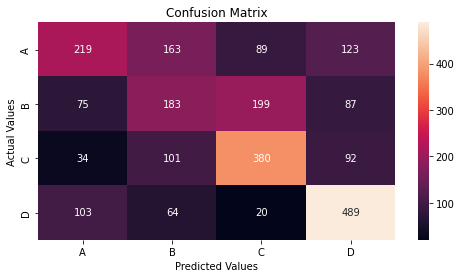

In [165]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm, index = ['A','B','C','D'], columns = ['A','B','C','D'])

#Plotting the confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True,cbar=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

## Step10: Hyperparamater Tuning with Gradient Boosting Classifier

In [ ]:
# create the training set and the test set 
#train_X, valid_X, train_y, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [171]:
learning_rate =  [0.001, 0.01, 0.1, 1.0]

n_estimators = [10,20,50,100]

criterion = ['friedman_mse', 'squared_error', 'mse']

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [2,52,72,102,152,202,252,302,352,402,452]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [2,5,7,11,17,23,27,31,37,43,47]

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [1,10,20,50,90,120,150,200,240,300,340,400,460,500]

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [0.0, 0.01, 0.0001]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [2,10,20,30,50,80,100,150]

# Create the random grid
param_grid_random = {
                      'learning_rate': learning_rate,
                      'n_estimators': n_estimators,
                      'criterion': criterion,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                       'max_depth': max_depth,
                     'min_impurity_decrease' : min_impurity_decrease,
                      'max_leaf_nodes' : max_leaf_nodes }

In [204]:
learning_rate =  [0.01, 0.1, 1.0]

n_estimators = [10,20,50]

criterion = ['friedman_mse', 'mse']

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [2,5,7,11]

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [10,90,150]

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [0.0, 0.01, 0.001]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [2,10,20]

# Create the random grid
param_grid_random = {
                      'n_estimators': n_estimators,
                      'criterion': criterion,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                       'max_depth': max_depth,
                     'min_impurity_decrease' : min_impurity_decrease,
                      'max_leaf_nodes' : max_leaf_nodes }

In [205]:
best_grid_search_model = GridSearchCV(estimator=GradientBoostingClassifier(random_state=random_seed), 
                                    scoring='accuracy', param_grid=param_grid_random, cv=10, verbose=0,  n_jobs = -1)
best_grid_search_model = best_grid_search_model.fit(train_X, train_y)

In [206]:
print('Best parameters found: ', best_grid_search_model.best_params_)

Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 10, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 30, 'n_estimators': 50}


In [207]:
y_pred = best_grid_search_model.predict(valid_X)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")


************************************
Accuracy Score:   0.5439900867410161


In [208]:
ada_hypreport = classification_report(y_test,y_pred,output_dict=True)
ada_df2 = pd.DataFrame(ada_hypreport).transpose()
ada_df2

,precision,recall,f1-score,support
0,0.458466,0.483165,0.470492,594.00000
1,0.400835,0.352941,0.375367,544.00000
2,0.620451,0.589786,0.604730,607.00000
3,0.649526,0.710059,0.678445,676.00000
accuracy,0.543990,0.543990,0.543990,0.54399
macro avg,0.532320,0.533988,0.532258,2421.00000
weighted avg,0.539478,0.543990,0.540839,2421.00000


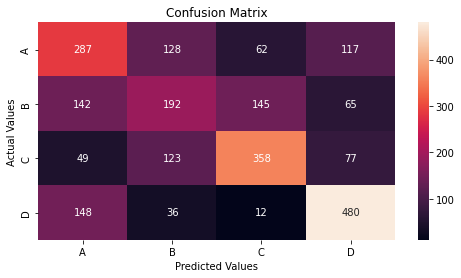

In [209]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm, index = ['A','B','C','D'], columns = ['A','B','C','D'])

#Plotting the confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True,cbar=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

## Step11: Hyperparamater Tuning with XG BOOST CLASSIFIER

In [188]:
params = {'max_depth': [3, 6, 10],
              'learning_rate': [0.01, 0.1],
              'subsample': [0.5,0.6,0.8],
              'colsample_bytree': [0.5,0.6,0.8],
              'colsample_bylevel': [0.5,0.6,0.8],
              'n_estimators': [100, 250],
              'num_class': [10]
              }

In [189]:
best_grid_search_model = GridSearchCV(estimator=XGBClassifier(random_state=random_seed), 
                                    scoring='accuracy', param_grid=params, cv=10, verbose=0,  n_jobs = -1)
best_grid_search_model = best_grid_search_model.fit(train_X, train_y)

In [192]:
print('Best parameters found: ', best_grid_search_model.best_params_)

Best parameters found:  {'colsample_bylevel': 0.8, 'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 250, 'num_class': 10, 'subsample': 0.8}


In [193]:
y_pred = best_grid_search_model.predict(valid_X)
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")

************************************
Accuracy Score:   0.5477075588599752


In [196]:
ada_hypreport = classification_report(y_test,y_pred,output_dict=True)
ada_df2 = pd.DataFrame(ada_hypreport).transpose()
ada_df2

,precision,recall,f1-score,support
0,0.478261,0.481481,0.479866,594.000000
1,0.407745,0.329044,0.364191,544.000000
2,0.608553,0.609555,0.609053,607.000000
3,0.632732,0.726331,0.676309,676.000000
accuracy,0.547708,0.547708,0.547708,0.547708
macro avg,0.531823,0.536603,0.532355,2421.000000
weighted avg,0.538215,0.547708,0.541115,2421.000000


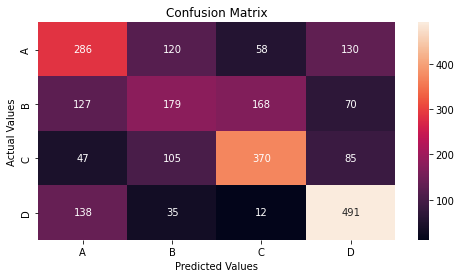

In [197]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm, index = ['A','B','C','D'], columns = ['A','B','C','D'])

#Plotting the confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True,cbar=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

We can see from below confusion matrix that,

For example, if we take class A, then let’s see what are the values of the metrics from the confusion matrix.

A) TP = 286

B) TN = 1515

C) FN = 127 + 47 + 138  

D) FP = 120+58+130

**Predicting the best accurate model on the test data provided**

In [194]:
segment_predict = best_grid_search_model.predict(customer_test_df)

In [200]:
print("************************************")
print(segment_predict)


************************************
[3 2 0 ... 0 1 3]


In [201]:
segment_predict.shape

(2627,)

### Step12: Analysis and Conclusion 

### Analysis of Hyper parameter tuning models

**=============================================================================================================**

Based on the above metric values such as accuracy,precision, f1 score and recall we can say that the Hyperparameter tuned XG BOOST CLASSIFIER outperformed all of the other classifiers.

**Accuracy:** Accuracy from model also got increased from 52% to 54.7% in XG Boost Classifier.

**Recall:** Recall value got increased in XG Boost Classifier. This is because of the reduce in number of False Negatives and increase in number of True Positives.

**Precision:** Precision value also got increased in XG Boost Classifier because of the reduce in number of False positives and increase in number of True Positives





***Predicting the customer segment for the customers provided in the test data using the highest accuracy model ***

Accuracy of all the classifiers that we have tested in this document

1. KNN Classifier - 52.2
2. Decision Tree Classifier - 52.2 
3. Random Forest Classifier - 54.15
4. ADA Boost Classifier - 52.50
5. Gradient Boosting Classifier - 54.30
6. XG Boost Classifier - 54.77

**Conclusion:**

**From above metric results, we are selecting XG Boost Classifier in order to predict the customer segements that are stated in the problem statement as it has the highest accuracy across all the models.

Based on the values above from "segment_prediction" np array, we can say that we are 55% confident on the predicted values using XG Boost Classifier. 



**==============================================================================================================**